In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
!ls

scrubbed.csv     scrubbed.csv.zip ufo_eda.ipynb


In [97]:
df = pd.read_csv('scrubbed.csv')

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
df.dropna(inplace = True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
datetime                66516 non-null object
city                    66516 non-null object
state                   66516 non-null object
country                 66516 non-null object
shape                   66516 non-null object
duration (seconds)      66516 non-null object
duration (hours/min)    66516 non-null object
comments                66516 non-null object
date posted             66516 non-null object
latitude                66516 non-null object
longitude               66516 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


In [100]:
# Create a stripped year version of the date column
df['year'] = df.datetime.str.split(" ").apply(lambda x: x[0]).str.split('/').apply(lambda x: x[2])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 12 columns):
datetime                66516 non-null object
city                    66516 non-null object
state                   66516 non-null object
country                 66516 non-null object
shape                   66516 non-null object
duration (seconds)      66516 non-null object
duration (hours/min)    66516 non-null object
comments                66516 non-null object
date posted             66516 non-null object
latitude                66516 non-null object
longitude               66516 non-null float64
year                    66516 non-null object
dtypes: float64(1), object(11)
memory usage: 6.6+ MB


In [104]:
# minimise the column
df = df[['state', 'country', 'shape', 'duration (seconds)', 'year']]

In [105]:
df.sort_values(by = 'year', inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 46858 to 25344
Data columns (total 5 columns):
state                 66516 non-null object
country               66516 non-null object
shape                 66516 non-null object
duration (seconds)    66516 non-null object
year                  66516 non-null object
dtypes: object(5)
memory usage: 3.0+ MB


In [108]:
# take only values inside of us
df = df[df.country == 'us']

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63553 entries, 46858 to 25344
Data columns (total 5 columns):
state                 63553 non-null object
country               63553 non-null object
shape                 63553 non-null object
duration (seconds)    63553 non-null object
year                  63553 non-null object
dtypes: object(5)
memory usage: 2.9+ MB


In [111]:
df.columns = [column.replace(" ", "") for column in df.columns]
df.columns = [column.replace(")", "") for column in df.columns]
df.columns = [column.replace("(", "_") for column in df.columns]
df.columns = [column.strip() for column in df.columns]

In [112]:
df.shape

(63553, 5)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63553 entries, 46858 to 25344
Data columns (total 5 columns):
state               63553 non-null object
country             63553 non-null object
shape               63553 non-null object
duration_seconds    63553 non-null object
year                63553 non-null object
dtypes: object(5)
memory usage: 2.9+ MB


In [114]:
df['observation'] = 1

In [119]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63553 entries, 46858 to 25344
Data columns (total 6 columns):
state               63553 non-null object
country             63553 non-null object
shape               63553 non-null object
duration_seconds    63553 non-null object
year                63553 non-null object
observation         63553 non-null int64
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [126]:
df.duration_seconds.astype(float).size

63553

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63553 entries, 46858 to 25344
Data columns (total 6 columns):
state               63553 non-null object
country             63553 non-null object
shape               63553 non-null object
duration_seconds    63553 non-null object
year                63553 non-null object
observation         63553 non-null int64
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [128]:
df.columns = [column.replace(" ", "") for column in df.columns]
df.columns = [column.replace(")", "") for column in df.columns]
df.columns = [column.replace("(", "_") for column in df.columns]
df_usa.columns = [column.strip() for column in df_usa.columns]

In [137]:
df.duration_seconds = df.duration_seconds.astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63553 entries, 46858 to 25344
Data columns (total 6 columns):
state               63553 non-null object
country             63553 non-null object
shape               63553 non-null object
duration_seconds    63553 non-null float64
year                63553 non-null object
observation         63553 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ MB


In [139]:
cali = df[df.state=='ca']

In [145]:
def get_state_dict(dataframe):
    state_dict={}
    for state in dataframe.state.unique():
        state_df = dataframe[dataframe['state'] == state]
        state_dict.update({state: state_df.groupby(['year']).observation.sum()})
    return state_dict

In [151]:
state_dict= get_state_dict(df)
print(state_dict['pr'])

year
1965    1
1970    1
1972    1
1973    1
1974    1
1975    1
1983    1
1989    1
1992    1
1995    2
1997    1
1998    3
1999    2
2000    1
2001    2
2002    3
2004    1
Name: observation, dtype: int64


In [158]:
fig, axes = plt.subplots(11,5)

for i in range(1, len(state_dict.keys())+1):
    print(1,1,i)

SyntaxError: invalid syntax (<ipython-input-158-b47d2e9df122>, line 4)

In [ ]:
x = np.linspace(start=0, stop=100, num=10**3)
y = [xi**2 for xi in x]
plt.scatter(x,y)
xticks = np.linspace(start=0, stop=200, num=11)
yticks = np.linspace(start=0, stop=10**5, num=11)
plt.xticks(xticks); #Adding a semicolon after the call will prevent extraneous input from being displayed
plt.yticks(yticks);
plt.title('Displaying Terrible Use of plt.xticks() and plt.yticks()');

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticks'

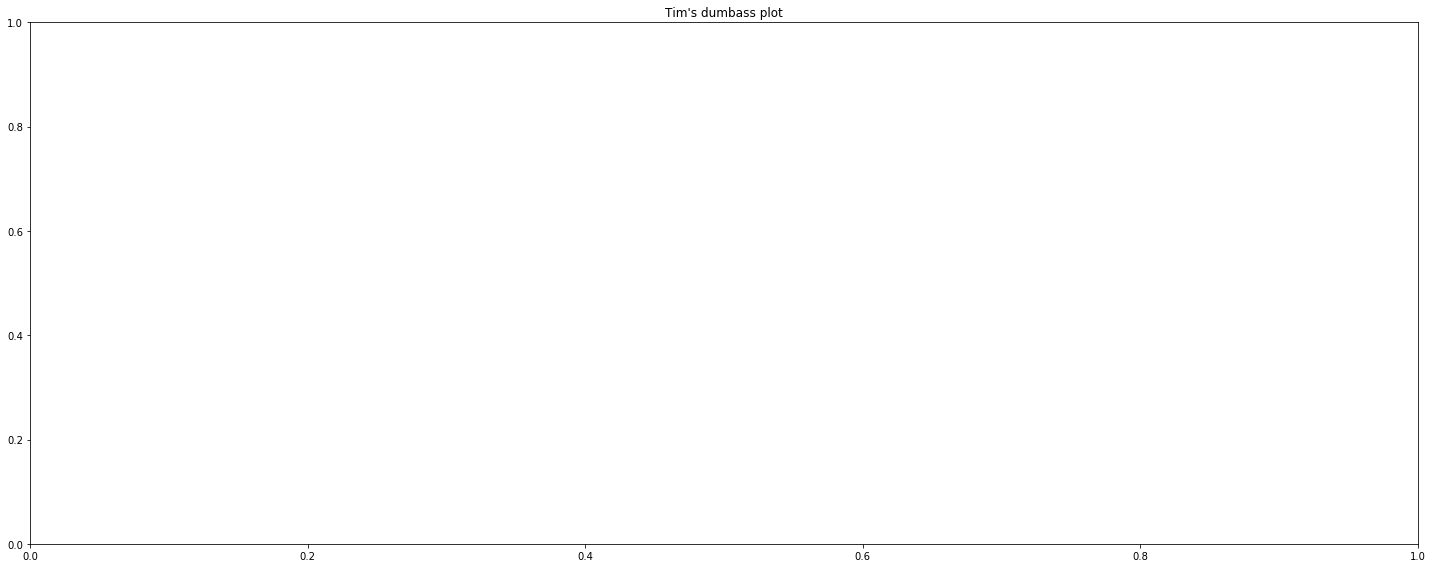

In [209]:
fig = plt.figure(figsize=(20,8))
ax.set_xticklabels(range(1900,2000,20))
ax.xaxis.set(ticks=range(1900,2000,20),
            ticklabels=[3,100,-12,"foo"])
ax = fig.add_subplot(111)
ax.set_title("Tim's dumbass plot")
fig.tight_layout() 
plt.set_xticks(rotation=45)
for state in state_dict.keys():
    ax.plot(y[state].index, y[state]);


In [189]:
y['ca'].index

Index(['1937', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object', name='year')

In [177]:
ax.xaxis.set_ticks(np.arange(1900, 2000, 20))

In [ ]:
for state in state_dict.keys():
    # Do something
    # Make and axes object
    # Set it's y values to state_dict[state]
    # set it's x values to state_dict[state].index (year)
    # ax.scatter(x,y)

In [166]:
df_usa.year = df_usa.year.astype(int)

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [236]:
df_usa['observations'] = 1
y1 = df_usa.groupby(['year']).observations.sum().sort_values()
y1 = [x for x in y1]
x2 = y.index
print(y1)

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 7, 7, 8, 12, 15, 21, 23, 24, 31, 36, 37, 38, 40, 42, 43, 50, 55, 60, 68, 76, 95, 106, 117, 118, 121, 132, 133, 140, 145, 149, 159, 161, 169, 171, 173, 177, 181, 182, 184, 187, 189, 193, 196, 204, 215, 217, 226, 245, 255, 316, 413, 431, 976, 1394, 1931, 2149, 2197, 2399, 2413, 2859, 2916, 3192, 3202, 3445, 3507, 3612, 3971, 4332, 5991, 6253]


/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
y = df_usa.groupby(['year']).duration_seconds.mean()
x = y.index

In [1]:
fig = plt.figure(num = 2,figsize=(16,8))
ax1 = fig.add_subplot(211)
ax = fig.add_subplot(212)
ax.plot(x,y);
ax1.plot(x1,y1);
# ax.set_xticklabels(rotation = 45)

NameError: name 'plt' is not defined